# サポートベクターマシン（Support Vector Machines）

サポートベクターマシン (SVM)は、サンプル群を上手に分類する境界線を見つけようとする方法である。多クラス分類にも利用可能である。

目次

    Part 1: SVMの原理
    Part 2: カーネル法
    Part 3: scikit-learnでSVM

## Part 1: SVMの原理

まずは、SVMのおおまかな原理を掴む。

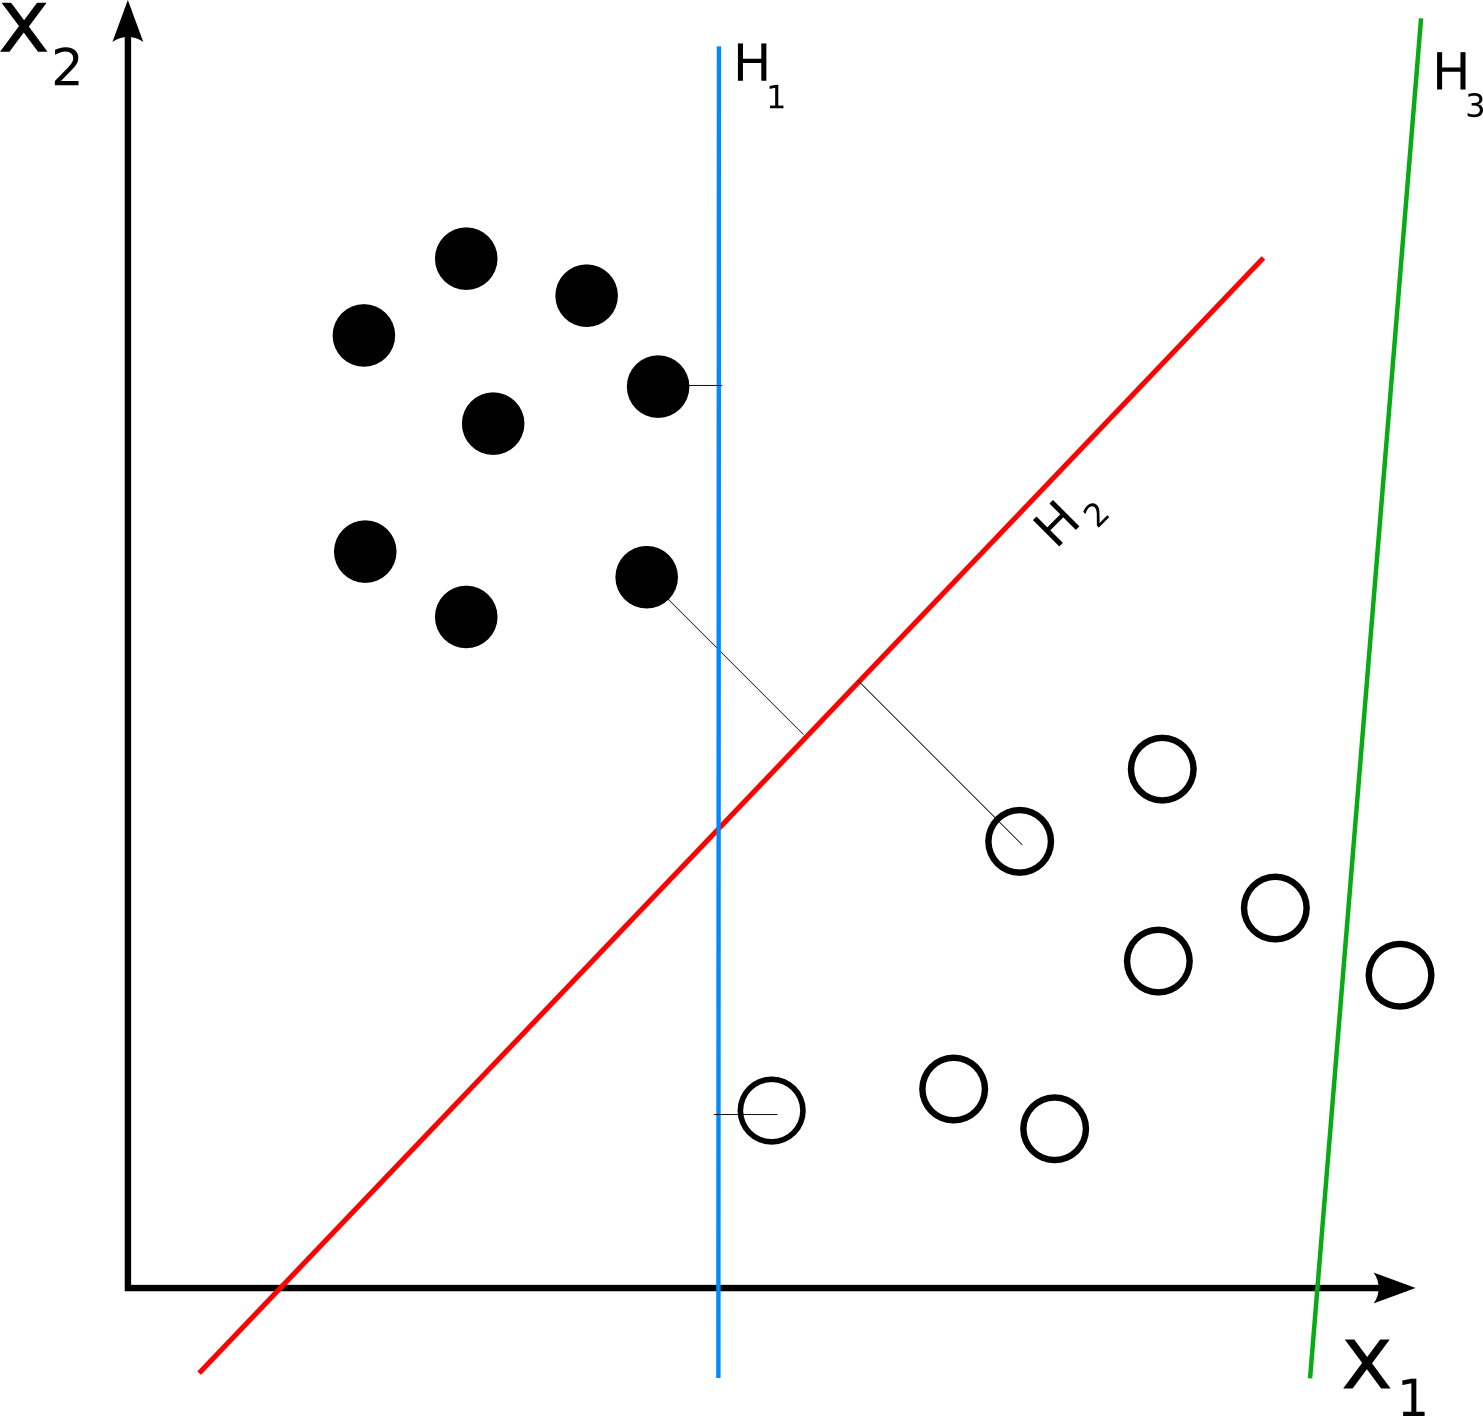

In [1]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/2/20/Svm_separating_hyperplanes.png'
Image(url, width=450)

#### SVMは、●のグループと○のグループとを分離する超平面を求める。
#### 2次元平面の場合、この超平面は直線になる。
#### 直線$H_2$は、●グループと○グループを分離し、さらにグループと直線との間に余裕がある。
#### 直線$H_1$もグループを分離しているが、直線の近くに●や○が存在し、余裕がない。
#### 直線$H_3$は論外。

## Part 2: カーネル法

いつも超平面で分離できるとは限らない。そんな時、役に立つ手法がカーネル法である。

カーネル法は、サンプルを分離できないならば、サンプルを別の空間に写像して、新しい空間で分離できる面を探す。

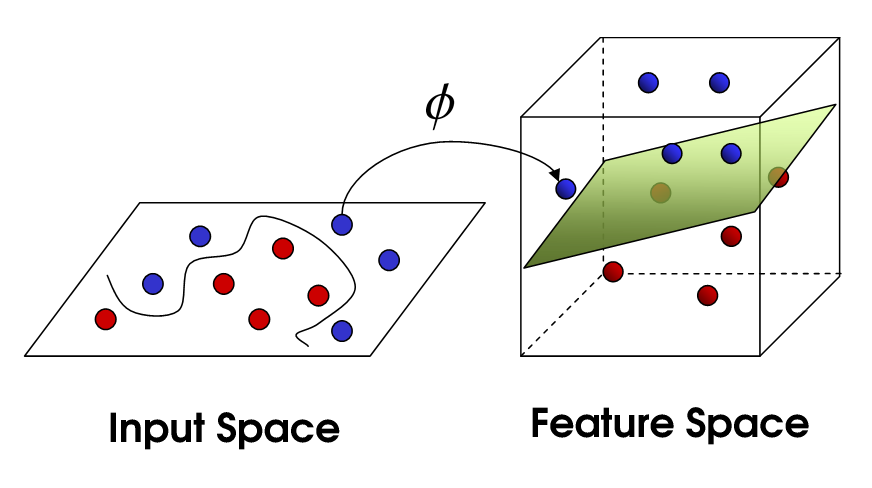

In [2]:
# 特徴量空間におけるカーネルトリック
url='http://i.imgur.com/WuxyO.png'
Image(url)

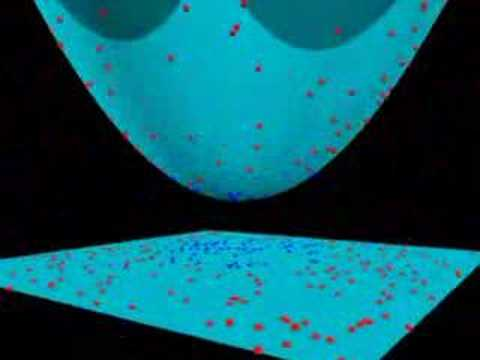

In [3]:
# カーネル法がよく分かる動画。
from IPython.display import YouTubeVideo
YouTubeVideo('3liCbRZPrZA')

## Part 3: scikit-learnを使ったSVMの実際

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

アヤメのデータをimportするところから始める。

In [7]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data

Y = iris.target

print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

パラメータについて、ドキュメントを参照のこと。

[SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) (Support Vector Classification) 

[SVM library of Sci Kit Learn](http://scikit-learn.org/stable/modules/svm.html)


In [12]:
from sklearn.svm import SVC

インスタンスを作る。

In [13]:
model = SVC()

データをトレーニングデータとテストデータとに分ける。交差検証を採用。

In [14]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=3)                                                

In [15]:
# モデルをトレーニングする。
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

モデルの予測精度を見る。

In [16]:
from sklearn import metrics

predicted = model.predict(X_test)
expected = Y_test

print(metrics.accuracy_score(expected,predicted))

0.9736842105263158


非常に高い予測精度が得られた。

デフォルトでは、RBFカーネルが使われている。

それぞれのカーネルの違いを[scikit-learnのドキュメント](http://scikit-learn.org/stable/modules/svm.html#svm-classification)に詳しく載っている。

SVMは、カーネルを調整することによって、直線とか平面とかで分離できない場合に対応している。



#### ラジアル基底関数カーネル（RBFカーネル、ガウシアンカーネル）

ラジアル基底関数(RBF, radial basis function)カーネル（ガウシアンカーネルとも呼ばれます）は次式で与えらられる。パラメータ

σ(>0)

はユーザーが指定する。

$$K(x,x')=\exp(-\sigma||x-x'||^2)$$

データに関する事前知識がない場合に用いられる汎用的なカーネルである。

### カーネルの違いを確認

In [17]:
from sklearn import svm

# 図示できるのが2次元までなので、変数を2つに絞る。
X = iris.data[:,:2]
Y = iris.target

# SVMの正則化パラメータ
C = 1.0  

# SVC with a Linear Kernel
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)

# Gaussian Radial Bassis Function
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)

# SVC with 3rd degree poynomial
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)

# SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

In [18]:
# step size
h = 0.02

# X軸の最大最小
x_min=X[:, 0].min() - 1
x_max =X[:, 0].max() + 1

# Y軸の最大最小
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

# meshgridを作る。
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [19]:
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/contour.py:909: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


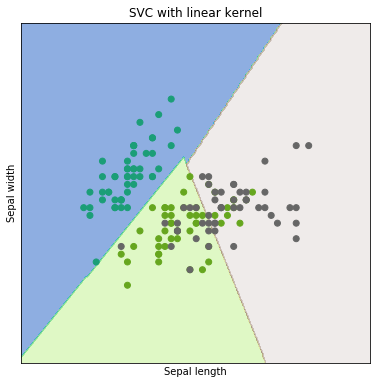

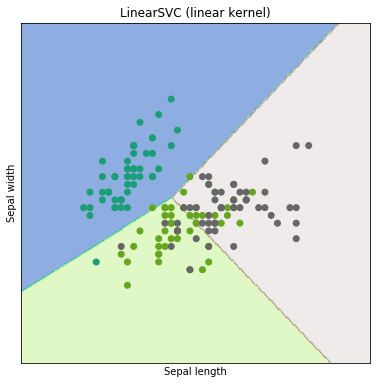

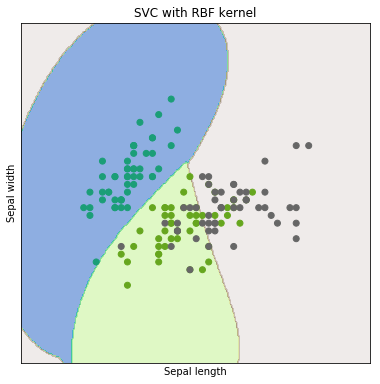

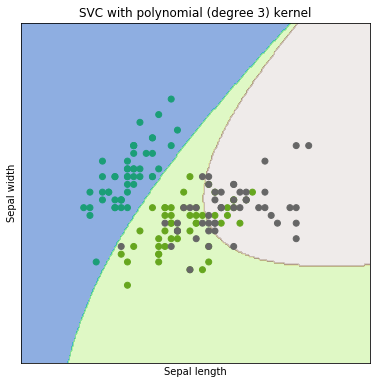

In [20]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # 境界線を描画する。
    plt.figure(figsize=(15,15))
    plt.subplot(2, 2, i + 1)
    
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
    
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    


plt.show()